## Introductory Machine Learning: Assignment 5

**Deadline:**

Assignment 5 is due Thursday, November 11 at 11:59pm. Late work will not be accepted as per the course policies (see the Syllabus and Course policies on [Canvas](https://canvas.yale.edu).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on [Canvas](https://canvas.yale.edu).  You can also post questions or start discussions on [Ed Discussion](https://edstem.org/us/courses/9209/discussion/). The problems are broken up into steps that should help you to make steady progress.

**Submission:**

Submit your assignment as a .pdf on Gradescope, and as a .ipynb on Canvas. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to find your complete solution to each problem.

To produce the .pdf, please do the following in order to preserve the cell structure of the notebook:  
1.  Go to "File" at the top-left of your Jupyter Notebook
2.  Under "Download as", select "HTML (.html)"
3.  After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
4.  From the print window, select the option to save as a .pdf

**Topics**
1. Language models
2. Work embeddings

### Problem 1: Gutenberg Books Language Models (15 points)

For this problem you will process books from the [Project Gutenberg](https://www.gutenberg.org/) site which is a public respository of large numbers of books that are in the public domain. You'll build *character-based* (as opposed to word-based) language models on one book, and predict the letters of the other book using the model.


In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plots
%matplotlib inline

The following helper function `read_url` reads in the text at the given url, and then uses some 
[regular expressions](https://www.w3schools.com/python/python_regex.asp) to process the book, removing 
everything but the letters a-z, space and period.

In [2]:
from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

def process_text(text):
    text = re.sub('[^a-zA-z .]', '', text.lower())
    return re.sub('[\[\]\_]', '', text)


<img src="https://www.gutenberg.org/cache/epub/76/pg76.cover.medium.jpg" width="110" align="top">

The online book for "Adventures of Huckleberry Finn," by Mark Twain, is [here](https://www.gutenberg.org/ebooks/76).
From this web site you can see various metadata for the book as well as the [link the text itself](https://www.gutenberg.org/files/76/76-0.txt), which is [https://www.gutenberg.org/files/76/76-0.txt](https://www.gutenberg.org/files/76/76-0.txt)

The book for Mark Twain's "A Connecticut Yankee in King Arthur's Court" is [here](https://www.gutenberg.org/ebooks/86).
In the following cell we read in both of these books, and remove all characters except a-z, space, and period.

In [3]:
huck_finn_url = 'https://www.gutenberg.org/files/76/76-0.txt'
huck_finn_text_raw = read_url(huck_finn_url)
huck_finn_text = process_text(huck_finn_text_raw)

ct_yankee_url = 'https://www.gutenberg.org/files/86/86-0.txt'
ct_yankee_text_raw = read_url(ct_yankee_url)
ct_yankee_text = process_text(ct_yankee_text_raw)

In [4]:
print("\nSample of raw text:\n")
print(huck_finn_text_raw[10000:11000])

print("\nSample of processed text:\n")
print(huck_finn_text[10000:11000])


Sample of raw text:

my old rags and my sugar-hogshead again, and was free and satisfied. But Tom Sawyer he hunted me up and said he was going to start a band of robbers, and I might join if I would go back to the widow and be respectable. So I went back. The widow she cried over me, and called me a poor lost lamb, and she called me a lot of other names, too, but she never meant no harm by it. She put me in them new clothes again, and I couldn't do nothing but sweat and sweat, and feel all cramped up. Well, then, the old thing commenced again. The widow rung a bell for supper, and you had to come to time. When you got to the table you couldn't go right to eating, but you had to wait for the widow to tuck down her head and grumble a little over the victuals, though there warn't really anything the matter with them,--that is, nothing only everything was cooked by itself. In a barrel of odds and ends it is different; things get mixed up, and the juice kind of swaps around, and the things

<img src="https://www.gutenberg.org/cache/epub/1342/pg1342.cover.medium.jpg" width="110" align="top">


The online book for "Pride and Prejudice", by Jane Austen, is [here](https://www.gutenberg.org/ebooks/1342).
And [here](https://www.gutenberg.org/ebooks/158) is the online book for Jane Austen's "Emma".  In the following cell we read in both of these books, and remove all characters except a-z, space, and period.



In [5]:
pride_and_prejudice_url = 'https://www.gutenberg.org/files/1342/1342-0.txt'
pride_and_prejudice_text_raw = read_url(pride_and_prejudice_url)
pride_and_prejudice_text = process_text(pride_and_prejudice_text_raw)


emma_url = 'https://www.gutenberg.org/files/158/158-0.txt'
emma_text_raw = read_url(emma_url)
emma_text = process_text(emma_text_raw)

In [6]:
print("\nSample of raw text:\n")
print(emma_text_raw[10000:11000])

print("\nSample of processed text:\n")
print(emma_text[10000:11000])


Sample of raw text:

all are.” Emma spared no exertions to maintain this happier flow of ideas, and hoped, by the help of backgammon, to get her father tolerably through the evening, and be attacked by no regrets but her own. The backgammon-table was placed; but a visitor immediately afterwards walked in and made it unnecessary. Mr. Knightley, a sensible man about seven or eight-and-thirty, was not only a very old and intimate friend of the family, but particularly connected with it, as the elder brother of Isabella’s husband. He lived about a mile from Highbury, was a frequent visitor, and always welcome, and at this time more welcome than usual, as coming directly from their mutual connexions in London. He had returned to a late dinner, after some days’ absence, and now walked up to Hartfield to say that all were well in Brunswick Square. It was a happy circumstance, and animated Mr. Woodhouse for some time. Mr. Knightley had a cheerful manner, which always did him good; and his man

The following cell defines some helper code. You should just run this cell; do not change any of the code. 

The first function, `ngrams`, takes some input text and a value of `n`. The function then 
iterates over the string and counts the number of occurrences of each substring of `n` characters. This is done with the very handy `Counter` class. 

We then define a class `language_model` that is a 4-gram character-based language model. The probability of the "next character" is computed using linear interpolation, as described in class.  A weight is assigned to unigrams, bigrams, trigrams, and four-grams (quadgrams?). The bigram probability that, for example, the letter `t` follows the letter `h` is the count of the bigram `ht` divided by the count of the unigram `h`. We add a little bit (1e-10) to the denominator to avoid dividing by zero. 

We return the logarithm of the probability, because this will be convenient when computing perplexities.


In [7]:
def ngrams(text, n=2):
    return Counter([text[(i-n):i] for i in np.arange(n, len(text)+1)])

class language_model:

    def __init__(self, text):
        self.one = ngrams(text, 1)
        self.two = ngrams(text, 2)
        self.three = ngrams(text, 3)
        self.four = ngrams(text, 4)
        self.weight = [0.1, 0.2, 0.3, 0.4]
        
    def set_weights(self, weights):
        self.weight = weights / np.sum(weights)
        
    def log_probability(self, gram):
        numer = [self.one[gram[3:]], self.two[gram[2:]], self.three[gram[1:]], self.four[gram[0:]]]
        denom = [sum(self.one[g] for g in self.one), self.one[gram[2:3]], self.two[gram[1:3]], self.three[gram[0:3]]]
        prob = 0
        for i in np.arange(4):
            prob += self.weight[i] * numer[i] / (denom[i]+1e-10)
        return np.log(prob)
    


### Problem 1.1

Just to be sure we understand what a character-based language model is, let's write an expression 
for the probability in an example. Suppose the language model assigns 
weight $w_1 = 0.1$ to the unigram model, weight $w_2 = 0.2$ to the bigram model, weight $w_3 = 0.3$ to the trigram model, and weight $w_4 = .4$ to the four-gram model. Note that we must have $w_1+w_2+w_3+w_4 = 1$.

Write an expression for the probability $p(\mbox{z} \,|\, \mbox{qui})$ that the letter $\mbox{z}$ follows the three letters $\mbox{qui}$. Assume that the unigram, bigram, trigram, and four-gram components are given by ratios of 
counts in the training data, as in the code above. For example, the bigram probability would be written as 

$$ \frac{\mbox{count}(iz)}{\mbox{count}(i)}$$


$p(\mbox{z} \,|\, \mbox{qui})$ = $ w1 * \frac{\mbox{count}(z)}{\mbox{count}(all  letters)}w_2 * \frac{\mbox{count}(iz)}{\mbox{count}(i)} + w_3 * \frac{\mbox{count}(uiz)}{\mbox{count}(ui)} + w_4 * \frac{\mbox{count}(quiz)}{\mbox{count}(qui)}$

Now, the cell below constructs two language models, one on the text of Jane Austen's "Emma", the other on 
the text of Mark Twain's "Huckleberry Finn". 

In [8]:
emma_lm = language_model(emma_text)
huck_finn_lm = language_model(huck_finn_text)
ct_lm = language_model(ct_yankee_text)
temp_text = ngrams(emma_text, n=4)
len(temp_text)
temp_text

Counter({'the ': 5397,
         'he p': 533,
         'e pr': 283,
         ' pro': 649,
         'proj': 93,
         'roje': 93,
         'ojec': 93,
         'ject': 288,
         'ect ': 396,
         'ct g': 91,
         't gu': 93,
         ' gut': 88,
         'gute': 97,
         'uten': 98,
         'tenb': 98,
         'enbe': 97,
         'nber': 97,
         'berg': 97,
         'erg ': 31,
         'rg e': 4,
         'g eb': 4,
         ' ebo': 20,
         'eboo': 21,
         'book': 37,
         'ook ': 192,
         'ok o': 19,
         'k of': 150,
         ' of ': 4364,
         'of e': 130,
         'f em': 21,
         ' emm': 845,
         'emma': 870,
         'mma ': 720,
         'ma b': 27,
         'a by': 3,
         ' by ': 591,
         'by j': 4,
         'y ja': 7,
         ' jan': 299,
         'jane': 303,
         'ane ': 278,
         'ne a': 120,
         'e au': 19,
         ' aus': 4,
         'aust': 5,
         'uste': 20,
         'sten': 71,


### Problem 1.2

In this sub-problem, your job is to write a function that takes a language model `lm`, and a text string `text`, and computes the perplexity of the language model on the text. 

Hints:
* Your function can ignore the first three characters of the text. Thus, you can begin predicting the fourth character from the first three.
* Either extract the sequence of 4-character substrings, or make a call to `ngrams(text, n=4)` to get a set of 4-grams and their counts on the text.
* Compute the logarithm of probability of the text. If you compute the probability, you will get a very tiny number and numerical "underflow". 
* Use the function `lm.log_probability` where `lm` is a instance of the class `language_model`. For example, `emma_lm.log_probability('emma')` will compute the logarithm of the probability that the character "a" follows the three characters "emm" using the language model computed on Jane Austen's "Emma". 
* Once you have the logarithm of the probability of the entire text, you'll need to scale appropriately and then take the exponential, using `np.exp`.
* Work out the formula by "pencil and paper" before trying to write the function.


In [9]:
def compute_perplexity(text, lm):
    temp_text = ngrams(text, n=4)
    perp = 0
    for gram in temp_text:
        perp += lm.log_probability(gram) * temp_text[gram]
    perp = np.exp(perp * (-1 / len(text)))
    return perp# replace with appropriate value

### Problem 1.3 

To test your implementation of the perplexity function, evaluate the followign cell. This 
computes the perplexity of the "Emma" language model on all four of the books: "Emma", "Pride and Prejudice", "Huckleberry Finn", and "Connecticut Yankee". For this problem, you will be graded on whether or not you get the correct four numbers for each of these perplexities.

Just run the following cell, which will evaluate the perplexities and print them out. No need to modify the code.

In [10]:
hf_perp = compute_perplexity(huck_finn_text, emma_lm)
ct_perp = compute_perplexity(ct_yankee_text, emma_lm)
pp_perp = compute_perplexity(pride_and_prejudice_text, emma_lm)
em_perp = compute_perplexity(emma_text, emma_lm)

print("Perplexity on Huckleberry Finn: %.2f" % hf_perp)
print("Perplexity on Connecticut Yankee: %.2f" % ct_perp)
print("Perplexity on Pride and Prejudice: %.2f" % pp_perp)
print("Perplexity on Emma: %.2f" % em_perp)

Perplexity on Huckleberry Finn: 6.42
Perplexity on Connecticut Yankee: 6.18
Perplexity on Pride and Prejudice: 5.49
Perplexity on Emma: 5.11


### Problem 1.4 

Now, interpret your results above. Explain the meaning of perplexity for a character-based language model. Which book has the lowest perpexity? Why is this? Which book has the second smallest perplexity? Does this make sense? Explain. 



If the perplexity for the model is $k$, the model predicts on average as if there were $k$ equally likely words to follow.  If a model assigns a high probability to the test set, it means that it is not surprised to see it (it’s not perplexed by it), which means that it has a good understanding of how the language works. *Emma* has the lowest perplexity, because it is the training set of emma_lm model and the model assigns high probability on this book. *Pride and Prejudice* has the second smallest perplexity. It makes sense because these two books written by the same author. Hence, they have the same language style and perfence, and similar themes and contents, which are quite different from the other two books written by Mark Twain.    

### Problem 1.5

Next, mix it up by computing the perplexity of the "Huckleberry Finn" language model on each of the four books. Comment on your findings.

In [11]:
hf_perp = compute_perplexity(huck_finn_text, huck_finn_lm)
ct_perp = compute_perplexity(ct_yankee_text, huck_finn_lm)
pp_perp = compute_perplexity(pride_and_prejudice_text, huck_finn_lm)
em_perp = compute_perplexity(emma_text, huck_finn_lm)
print("Perplexity on Huckleberry Finn: %.2f" % hf_perp)
print("Perplexity on Connecticut Yankee: %.2f" % ct_perp)
print("Perplexity on Pride and Prejudice: %.2f" % pp_perp)
print("Perplexity on Emma: %.2f" % em_perp)

Perplexity on Huckleberry Finn: 5.12
Perplexity on Connecticut Yankee: 6.17
Perplexity on Pride and Prejudice: 6.46
Perplexity on Emma: 6.44


 *Huck Finn* has the lowest perplexity, because it is the training set of huck_finn_lm model and the model assigns high probability on this book. *Conn Yankee* has the second smallest perplexity. It makes sense because these two books written by the same author. Hence, they have the same language style and perfence, and similar themes and contents, which are quite different from the other two books written by Jane Austen.    

### Problem 1.6

Finally, in this problem you should explore the choice of the weights assigned to unigrams, bigrams, trigrams, and four-grams. Recall that to set the weights on the language model `lm` you can use a function call like
`lm.set_weights([.25, .25, .25, .25])`

1. Try to find weights for the "Emma" model so that the perplexity of "Pride and Prejudice" is as small as possible. What weights do you find? Do these weights make sense to you?


2. Try to find weights for the "Emma" model so that the perplexity of "Huckleberry Finn" is as small as possible. What happens to the perplexity for "Pride and Prejudice"? Does this perplexity exceed that of "Huck Finn"? How do the weights you find compare to those you found above? Can you explain intuitively why they are different?


[your code and markdown here]


In [ ]:
total = 0
pp_final_perp = 100000
while total < 500:
    w4 = np.random.uniform(0.9, 1, 1)
    w3 = np.random.uniform(0, 1-w4, 1)
    w2 = np.random.uniform(0, 1-w4-w3, 1)
    w1 =  1-w4-w3-w2
    emma_lm = language_model(emma_text)
    emma_lm.set_weights([w1, w2, w3, w4])
    pp_perp = compute_perplexity(pride_and_prejudice_text, emma_lm)
    if pp_final_perp > pp_perp:
        pp_final_perp = pp_perp
        w1_final = w1
        w2_final = w2
        w3_final = w3
        w4_final = w4
    total = total + 1

In [13]:
emma_lm = language_model(emma_text)
emma_lm.set_weights([w1_final, w2_final, w3_final, w4_final])
pp_perp = compute_perplexity(pride_and_prejudice_text, emma_lm)
print("Perplexity on Pride and Prejudice: %.2f" % pp_perp)

Perplexity on Pride and Prejudice: 4.59


The weights is [0.01, 0.01, 0.05, 0.93]. It makes sense because they are written by the same author and they have the same language style and perfence. Hence, more weights on 4-gram or 3-gram can improve the perplexity of Pride and Prejudice.

In [ ]:
total = 0
pp_final_perp = 100000
while total < 500:
    w4 = np.random.uniform(0.5, 1, 1)
    w3 = np.random.uniform(0, 1-w4, 1)
    w2 = np.random.uniform(0, 1-w4-w3, 1)
    w1 =  1-w4-w3-w2
    emma_lm = language_model(emma_text)
    emma_lm.set_weights([w1, w2, w3, w4])
    pp_perp = compute_perplexity(huck_finn_text, emma_lm)
    if pp_final_perp > pp_perp:
        pp_final_perp = pp_perp
        w1_final = w1
        w2_final = w2
        w3_final = w3
        w4_final = w4
    total = total + 1

In [ ]:
emma_lm = language_model(emma_text)
emma_lm.set_weights([w1_final, w2_final, w3_final, w4_final])
huck_perp = compute_perplexity(huck_finn_text, emma_lm)
print("Perplexity on Huck Finn: %.2f" % huck_perp)
pp_perp = compute_perplexity(pride_and_prejudice_text, emma_lm)
print("Perplexity on P&P: %.2f" % pp_perp)
print([w1_final, w2_final, w3_final, w4_final])

Perplexity on Huck Finn: 6.02
Perplexity on P&P: 4.69
[array([0.01584392]), array([0.06461364]), array([0.15300654]), array([0.7665359])]


The perplexity on P&P increases, but this perplexity doesn't exceed that of "Huck Finn". The weights on 4-gram and 3-gram decrease and the weights on unigram and bigram increase. To decrease the perplexity of Emma model on Huck Finn, we should increase the prior probability intuitively because these two books are very different. However, Emma and P&P are written by the same author and they have the same language style and perfence. Hence, more weights on 4-gram or 3-gram can improve the perplexity of Pride and Prejudice.

### Problem 1.7 (Extra credit: 2 points)

Choose two books from the Gutenberg collection that are by the same author (different from Twain and Austen). Build a language model on one of the books, and test, by evaluating perplexity, on all of the other books, five books in all.  Where does the second book of the new author rank? Do the result make sense? Comment on your findings.

In [ ]:
hamlet_url = 'https://www.gutenberg.org/files/27761/27761-0.txt'
hamlet_text_raw = read_url(hamlet_url)
hamlet_text = process_text(hamlet_text_raw)

king_lear_url = "https://www.gutenberg.org/files/1532/1532-0.txt"
king_lear_text_raw = read_url(king_lear_url)
king_lear_text = process_text(king_lear_text_raw)

hamlet_lm = language_model(hamlet_text)
king_lear_lm = language_model(king_lear_text)

hf_perp = compute_perplexity(huck_finn_text, hamlet_lm)
ct_perp = compute_perplexity(ct_yankee_text, hamlet_lm)
pp_perp = compute_perplexity(pride_and_prejudice_text, hamlet_lm)
em_perp = compute_perplexity(emma_text, hamlet_lm)
kl_perp = compute_perplexity(king_lear_text, hamlet_lm)
print("Perplexity on Huckleberry Finn: %.2f" % hf_perp)
print("Perplexity on Connecticut Yankee: %.2f" % ct_perp)
print("Perplexity on Pride and Prejudice: %.2f" % pp_perp)
print("Perplexity on Emma: %.2f" % em_perp)
print("Perplexity on King Lear: %.2f" % kl_perp)

Perplexity on Huckleberry Finn: 6.72
Perplexity on Connecticut Yankee: 6.43
Perplexity on Pride and Prejudice: 6.26
Perplexity on Emma: 6.41
Perplexity on King Lear: 6.38


King Lear ranks the second among the five books. The result makes sense because the two books written by Mark Twain rank the last and there is no big gap between the perplexity of the other three books.

### Problem 2: Word embedding experiments (15 points)

In this problem you will run experiments on word embeddings using two different algorithms or configurations: (1) word2vec embeddings trained on the "text8" Wikipedia corpus (2) GloVe embeddings pre-trained on a much larger corpus.

The text8 data are described here: http://mattmahoney.net/dc/textdata.html. The text8 file is a 100MB excerpt of Wikipedia. This small dataset is sufficient for our exploratory purposes, but note that it is far too small for any real application.
In the next few parts of this problem, you will construct word embeddings from the Wikipedia data. 

`word2Vec` is a popular word embedding method. The following code will construct 100 dimensional embeddings on the text8 data.

In [24]:
import gensim
from gensim.models import word2vec
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', 
                    level=logging.INFO)
sentences = word2vec.Text8Corpus('https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn5/text8')
model = word2vec.Word2Vec(sentences, vector_size=100, window=10, min_count=10)

2021-11-11 23:40:40,912 : INFO : collecting all words and their counts
2021-11-11 23:40:41,115 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-11-11 23:40:53,912 : INFO : collected 253854 word types from a corpus of 17005207 raw words and 1701 sentences
2021-11-11 23:40:53,913 : INFO : Creating a fresh vocabulary
2021-11-11 23:40:54,245 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=10 retains 47134 unique words (18.56736549355141%% of original 253854, drops 206720)', 'datetime': '2021-11-11T23:40:54.245988', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22494-SP0', 'event': 'prepare_vocab'}
2021-11-11 23:40:54,246 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=10 leaves 16561031 word corpus (97.38800004022298%% of original 17005207, drops 444176)', 'datetime': '2021-11-11T23:40:54.246948', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13

The dictionary `model.wv`, keyed by words (as strings), has values which are the word embeddings (as numpy arrays).

We will also work with pre-trained GloVe embeddings. These embeddings were trained on a large corpus containing 6 billion tokens. You can load these embedding vectors using this code:

In [25]:
import gensim.downloader as gdl
glove = gdl.load("glove-wiki-gigaword-100")

2021-11-11 23:42:37,702 : INFO : loading projection weights from C:\Users\Ji Qi/gensim-data\glove-wiki-gigaword-100\glove-wiki-gigaword-100.gz
2021-11-11 23:43:34,943 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (400000, 100) matrix of type float32 from C:\\Users\\Ji Qi/gensim-data\\glove-wiki-gigaword-100\\glove-wiki-gigaword-100.gz', 'binary': False, 'encoding': 'utf8', 'datetime': '2021-11-11T23:43:34.943199', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22494-SP0', 'event': 'load_word2vec_format'}


Here is a sample evaluation: puppy is to dog as what is to kitten?

In [ ]:
glove.most_similar(positive = ['dog', 'kitten'], negative = ['puppy'])[0]

2021-11-08 14:56:51,891 : INFO : precomputing L2-norms of word weight vectors


('cat', 0.6935379505157471)

####  Experiments

Conduct the following experiments with **both sets of embeddings**: the local word2vec embeddings, and the pre-trained GloVe embeddings. Based on the available memory on your computer, you may need to perform the experiments for each set of embeddings in a fresh Python session. Comment on the qualitative differences in the results for each of the embeddings.


#### 2.1 Find the closest words

For each of the following words, find the 5 closest words in the embedding space, and report your results:

          yale, physics, dessert, einstein, algebra, fish
          
Here, "closest" means in terms of cosine similarity. See the gensim documentation; you might want to use the most similar function, or a related function. Choose five other query words yourself, and for each of them show the closest words in the embedding space. Comment on your findings.

In [ ]:
# your code and markdown here
print(
glove.most_similar('yale', topn=5),
glove.most_similar('physics', topn=5),
glove.most_similar('dessert', topn=5),
glove.most_similar('einstein', topn=5),
glove.most_similar('algebra', topn=5),
glove.most_similar('fish', topn=5))

[('harvard', 0.9161344766616821), ('princeton', 0.867539644241333), ('university', 0.8113802671432495), ('cornell', 0.8014455437660217), ('stanford', 0.787754476070404)] [('chemistry', 0.8498000502586365), ('mathematics', 0.834094762802124), ('science', 0.7914698719978333), ('biology', 0.7894973158836365), ('theoretical', 0.7342938780784607)] [('desserts', 0.8192153573036194), ('cake', 0.7649705410003662), ('delicious', 0.7600687146186829), ('chocolate', 0.738676905632019), ('cakes', 0.7226456999778748)] [('relativity', 0.6908349394798279), ('freud', 0.6417257785797119), ('physics', 0.6145339012145996), ('bohr', 0.6144247055053711), ('theory', 0.6042598485946655)] [('algebras', 0.7539783716201782), ('geometry', 0.6790961027145386), ('algebraic', 0.6474162340164185), ('boolean', 0.6418250799179077), ('commutative', 0.6322143077850342)] [('shrimp', 0.7793381214141846), ('salmon', 0.7608143091201782), ('tuna', 0.7485246658325195), ('meat', 0.7119255065917969), ('seafood', 0.69405633211135

In [28]:
print(
    model.wv.most_similar('yale', topn=5),
model.wv.most_similar('physics', topn=5),
model.wv.most_similar('dessert', topn=5),
model.wv.most_similar('einstein', topn=5),
model.wv.most_similar('algebra', topn=5),
model.wv.most_similar('fish', topn=5),
)

[('harvard', 0.8473474979400635), ('princeton', 0.8101245760917664), ('cornell', 0.803199827671051), ('rutgers', 0.7824962139129639), ('stanford', 0.7587567567825317)] [('electrodynamics', 0.7818374633789062), ('mechanics', 0.7781468033790588), ('theoretical', 0.7464304566383362), ('astronomy', 0.7415562272071838), ('electromagnetism', 0.7396538853645325)] [('stew', 0.8733224868774414), ('pork', 0.8663265109062195), ('grilled', 0.8562917709350586), ('steamed', 0.8535162210464478), ('tomato', 0.8523162603378296)] [('fermi', 0.8070806264877319), ('dinger', 0.7915767431259155), ('planck', 0.7912207245826721), ('heisenberg', 0.780948281288147), ('maxwell', 0.7670904994010925)] [('algebraic', 0.8693658113479614), ('topology', 0.838798999786377), ('associative', 0.8241924047470093), ('boolean', 0.8075669407844543), ('commutative', 0.7994086742401123)] [('foxes', 0.8467469811439514), ('cattle', 0.8179076313972473), ('shrimp', 0.8156296610832214), ('whales', 0.8089657425880432), ('sheep', 0.80

most of the top-5 closest words are similar words both in the same category and in the part of speech. For example, "yale", "harvard",and "princeton" are all ivy league universities and nouns; "physics", "mathematics", and "chemistry" are all natural science subjects and nouns. The other closest words of the word show some fundemental properties of the word. For example, "yale" is a "university"; "physics" is "theoretical" "science"; "fish" is a kind of "seafood".

In [26]:
print(
    model.wv.most_similar('harvard', topn=5),
model.wv.most_similar('mathematics', topn=5),
model.wv.most_similar('planck', topn=5),
model.wv.most_similar('geometry', topn=5),
model.wv.most_similar('shrimp', topn=5),
)

[('yale', 0.847323477268219), ('faculty', 0.7951253652572632), ('cornell', 0.7837936282157898), ('graduate', 0.7583586573600769), ('princeton', 0.7446129322052002)] [('mathematical', 0.8498882055282593), ('geometry', 0.738296627998352), ('algebra', 0.7314383387565613), ('calculus', 0.7209789156913757), ('logic', 0.7008056640625)] [('dinger', 0.7898844480514526), ('heisenberg', 0.7720593214035034), ('einstein', 0.7584236860275269), ('fermi', 0.75608891248703), ('physics', 0.7519253492355347)] [('geometric', 0.8217810392379761), ('trigonometry', 0.8076184988021851), ('calculus', 0.803760290145874), ('algebraic', 0.8016397953033447), ('topology', 0.7947611212730408)] [('citrus', 0.9097374677658081), ('seafood', 0.8997024893760681), ('beef', 0.8798601627349854), ('pork', 0.8787608742713928), ('potatoes', 0.8779131174087524)]


In [27]:
print(
    glove.most_similar('harvard', topn=5),
glove.most_similar('mathematics', topn=5),
glove.most_similar('planck', topn=5),
glove.most_similar('geometry', topn=5),
glove.most_similar('shrimp', topn=5),
)

[('yale', 0.9161344766616821), ('princeton', 0.8444410562515259), ('graduate', 0.8181679248809814), ('university', 0.8156033754348755), ('stanford', 0.810197114944458)] [('physics', 0.834094762802124), ('mathematical', 0.7631471157073975), ('science', 0.7607673406600952), ('biology', 0.7574610114097595), ('chemistry', 0.7529067397117615)] [('particle', 0.5575568675994873), ('astrophysics', 0.5189620852470398), ('cyclotron', 0.5111973881721497), ('boltzmann', 0.5060967206954956), ('entropy', 0.505074679851532)] [('algebraic', 0.757987380027771), ('differential', 0.7062228918075562), ('trigonometry', 0.7045199275016785), ('geometric', 0.6944104433059692), ('analytic', 0.6942931413650513)] [('lobster', 0.8110523819923401), ('prawns', 0.7906647324562073), ('crab', 0.7873328328132629), ('fish', 0.7793381214141846), ('scallops', 0.7699012756347656)]


We can find that the GloVe model is doing a better job than word2vec model, since GloVe model was trained on a much larger dataset based on Wikipedia. For example, the word "fish", 5 closest words by using word2vec model are: 'sheep', 'shrimp', 'cattle', 'foxes' and 'seafood'. However, 5 closest words by using GloVe model are: 'shrimp', 'salmon', 'tuna', 'meat' and 'seafood'. It is obvious that 'shrimp', 'salmon', 'tuna', 'meat' and 'seafood' are have something to do with 'fish'; however, 'cattle' and 'foxes' selected by word2vec doesn't have much thing to do with 'fish'.

#### 2.2 Complete analogies

A surprising consequence of some word embedding methods is that they can be used to resolve analogies, like

                   france :  paris ::  england :  ?
                   
You can "solve" this analogy by computing the nearest embedding vector to $v$ where, $v = v_{paris} − v_{france} + v_{england}$.

Solve the following analogies with both sets of word embeddings and report your results:

                   france :  paris ::  england :  ?
                   france :  paris ::  germany :  ?
                     queen :  woman ::  king :  ?
                     
Choose five other analogies yourself, and report the results.

In [ ]:
glove.most_similar(positive=['paris', 'england'], negative=['france'], topn=10)

[('london', 0.8123227953910828),
 ('melbourne', 0.7388997077941895),
 ('sydney', 0.714728832244873),
 ('birmingham', 0.696514904499054),
 ('perth', 0.6886942386627197),
 ('cambridge', 0.6872051954269409),
 ('oxford', 0.6779206991195679),
 ('leeds', 0.6770237684249878),
 ('dublin', 0.6747875213623047),
 ('manchester', 0.6740053296089172)]

In [29]:
model.wv.most_similar(positive=['paris', 'england'], negative=['france'], topn=10)

[('edinburgh', 0.7130708694458008),
 ('london', 0.676858127117157),
 ('glasgow', 0.6337019801139832),
 ('abbey', 0.6323848366737366),
 ('westminster', 0.6295573115348816),
 ('concord', 0.6265250444412231),
 ('worcester', 0.608669638633728),
 ('birmingham', 0.5902668237686157),
 ('surrey', 0.5862783193588257),
 ('nottingham', 0.5813407897949219)]

In [ ]:
glove.most_similar(positive=['paris', 'germany'], negative=['france'], topn=10)

[('berlin', 0.8846380710601807),
 ('frankfurt', 0.7985543608665466),
 ('vienna', 0.7675994038581848),
 ('munich', 0.7542588114738464),
 ('hamburg', 0.7182371616363525),
 ('bonn', 0.6890878081321716),
 ('prague', 0.6842440962791443),
 ('cologne', 0.6762093305587769),
 ('zurich', 0.6653268933296204),
 ('leipzig', 0.6619253754615784)]

In [30]:
model.wv.most_similar(positive=['paris', 'germany'], negative=['france'], topn=10)

[('berlin', 0.8328025937080383),
 ('munich', 0.7696191668510437),
 ('vienna', 0.7063215374946594),
 ('leipzig', 0.6916210055351257),
 ('frankfurt', 0.6666767001152039),
 ('freiburg', 0.6657721996307373),
 ('speer', 0.6483389735221863),
 ('heidelberg', 0.6460251212120056),
 ('dresden', 0.6415418982505798),
 ('bonn', 0.6391190886497498)]

In [ ]:
glove.most_similar(positive=['king', 'woman'], negative=['queen'], topn=10)

[('man', 0.790776789188385),
 ('father', 0.7224542498588562),
 ('son', 0.7012037038803101),
 ('boy', 0.6988654732704163),
 ('another', 0.6853840351104736),
 ('person', 0.6754911541938782),
 ('who', 0.6728038191795349),
 ('brother', 0.6645877957344055),
 ('mother', 0.6613163948059082),
 ('one', 0.6554158329963684)]

In [31]:
model.wv.most_similar(positive=['king', 'woman'], negative=['queen'], topn=10)

[('man', 0.6344357132911682),
 ('jew', 0.6257914304733276),
 ('son', 0.5733802914619446),
 ('child', 0.5629153251647949),
 ('prostitute', 0.5578898787498474),
 ('prophet', 0.5521579384803772),
 ('jacob', 0.5425581336021423),
 ('minotaur', 0.5401904582977295),
 ('descendant', 0.5394933819770813),
 ('stranger', 0.5387341976165771)]

In [ ]:
glove.most_similar(positive=['harvard', 'cambridge'], negative=['yale'], topn=10)

[('oxford', 0.8065130710601807),
 ('trinity', 0.6591581702232361),
 ('college', 0.6458384394645691),
 ('berkeley', 0.6405155658721924),
 ('university', 0.633739709854126),
 ('research', 0.6237657070159912),
 ('massachusetts', 0.6177628636360168),
 ('exeter', 0.6092889308929443),
 ('study', 0.6052048206329346),
 ('studies', 0.601348876953125)]

In [32]:
model.wv.most_similar(positive=['harvard', 'cambridge'], negative=['yale'], topn=10)

[('oxford', 0.7378795146942139),
 ('princeton', 0.6621752381324768),
 ('oup', 0.6253624558448792),
 ('phd', 0.6068180203437805),
 ('humanities', 0.5995826721191406),
 ('univ', 0.5791908502578735),
 ('lectures', 0.5747931599617004),
 ('stanford', 0.5738669037818909),
 ('marischal', 0.5729469060897827),
 ('academic', 0.5621044635772705)]

In [ ]:
glove.most_similar(positive=['trump', 'italy'], negative=['usa'], topn=10)

[('berlusconi', 0.6134708523750305),
 ('silvio', 0.5475398898124695),
 ('dini', 0.5409714579582214),
 ('scalfaro', 0.5239711403846741),
 ('stefano', 0.4917651414871216),
 ('lamberto', 0.490522176027298),
 ('prodi', 0.4878629446029663),
 ('domenico', 0.4548022150993347),
 ('juventus', 0.447188138961792),
 ('parma', 0.44440269470214844)]

In [33]:
model.wv.most_similar(positive=['trump', 'italy'], negative=['usa'], topn=10)

[('caligula', 0.528862714767456),
 ('tiberius', 0.5222833156585693),
 ('claudius', 0.522044837474823),
 ('soga', 0.5200117230415344),
 ('caesar', 0.5144539475440979),
 ('octavian', 0.5117034912109375),
 ('heraclius', 0.5025618672370911),
 ('usurper', 0.5015037059783936),
 ('agrippina', 0.49293211102485657),
 ('lepidus', 0.48556119203567505)]

In [ ]:
glove.most_similar(positive=['trump', 'japan'], negative=['usa'], topn=10)

[('abe', 0.5799363851547241),
 ('hashimoto', 0.5672397017478943),
 ('junichiro', 0.5445129871368408),
 ('koizumi', 0.5363299250602722),
 ('fukuda', 0.5132630467414856),
 ('yoshiro', 0.5123278498649597),
 ('hatoyama', 0.5096796751022339),
 ('shinzo', 0.5081068277359009),
 ('obuchi', 0.500024676322937),
 ('ivanka', 0.49894893169403076)]

In [34]:
model.wv.most_similar(positive=['trump', 'japan'], negative=['usa'], topn=10)

[('shogun', 0.5167736411094666),
 ('japanese', 0.48669618368148804),
 ('melee', 0.4746353328227997),
 ('character', 0.4620440602302551),
 ('token', 0.4617423415184021),
 ('emperor', 0.45105770230293274),
 ('blackjack', 0.4462856352329254),
 ('swaps', 0.44136255979537964),
 ('goldeneye', 0.4401916265487671),
 ('vlad', 0.43126559257507324)]

In [ ]:
glove.most_similar(positive=['usa', 'france'], negative=['canada'], topn=10)

[('germany', 0.5512969493865967),
 ('french', 0.5501134395599365),
 ('spain', 0.5493493676185608),
 ('paris', 0.5301828384399414),
 ('italy', 0.517480194568634),
 ('de', 0.511626660823822),
 ('america', 0.5081153512001038),
 ('v', 0.5019479393959045),
 ('lyon', 0.4998127222061157),
 ('belgium', 0.49166321754455566)]

In [35]:
model.wv.most_similar(positive=['usa', 'france'], negative=['canada'], topn=10)

[('italy', 0.6130130290985107),
 ('paris', 0.5933648347854614),
 ('switzerland', 0.5915034413337708),
 ('italiana', 0.5670886635780334),
 ('montreux', 0.5614999532699585),
 ('munich', 0.5507471561431885),
 ('commune', 0.5470203757286072),
 ('belgium', 0.5303712487220764),
 ('alsace', 0.5283372402191162),
 ('ukraine', 0.5259213447570801)]

In general, based on the above results, we can see that the GloVe model gave more reasonable answers. For example, for France to Paris , it makes sense to pick London for GloVe but not Edinghburg which is not an England city in Word2Vec.

#### 2.3 Visualize embeddings

Use the t-SNE dimensionality reduction technique to visualize the embeddings in two dimensions. The sample code below will perform the t-SNE method on a subset of the vocabulary. You can start with this code and modify it to construct visualizations of the embeddings, or start with your own version of t-SNE.

The code provided shows the relative positions of the words conservative, liberal, elephant, and donkey based on GloVe embeddings. For your local embeddings, you may use similar code to visualize the embeddings. 

Find at least three more examples that produce expected results and three examples that produce surprising results. Include the plots in your write-up. Give reasons why you might see surprising behavior here.

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# this functions computes and displays the 2-d t-SNE maps for a subset of the embedding vectors
# and displays them together with the points for a set of input words.

def display_tsne_neighborhood(model, input_word, nsample=1000, size1=2, size2=10, offset=5):
    
    arr = np.empty((0,100), dtype='f')
    word_label = input_word

    # add the vector for each of the closest words to the array
    for w in range(len(input_word)):
        arr = np.append(arr, np.array([model[input_word[w]]]), axis=0)

    voc = [w for w in model.key_to_index]
    wrds = np.random.choice(range(len(voc)), size=nsample, replace=False)
    for w in wrds:
        wrd_vector = model[voc[w]]
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coord = Y[:, 0]
    y_coord = Y[:, 1]
    # display scatter plot
    size=2
    plt.scatter(x_coord, y_coord, s=size1)
    plt.scatter(x_coord[0:len(input_word)], y_coord[0:len(input_word)],s=size2)
    
    # label the input words
    for w in range(len(input_word)):
        plt.annotate(input_word[w], xy=(x_coord[w],y_coord[w]), 
                     xytext=(w*offset,w*offset), textcoords='offset points')
    plt.show()

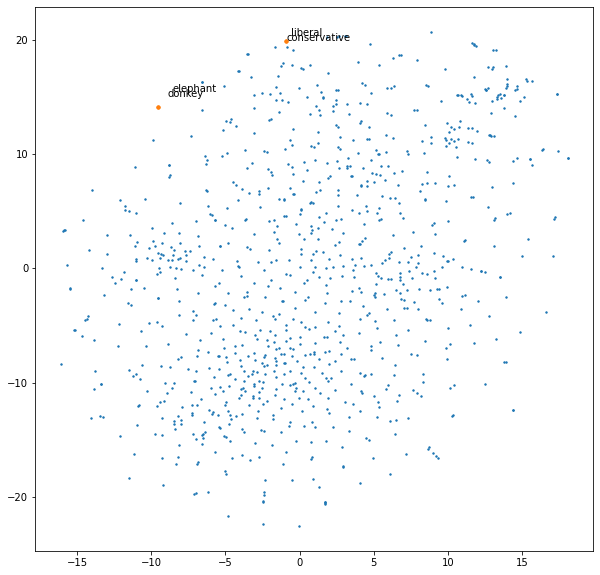

In [23]:
%matplotlib inline
plt.figure(figsize=(10,10))
display_tsne_neighborhood(glove, input_word = ['conservative', 'liberal', 'donkey', 'elephant'])

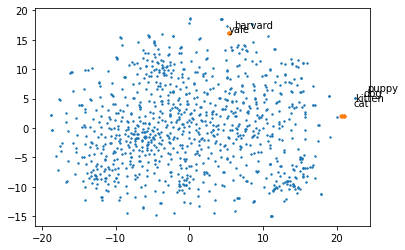

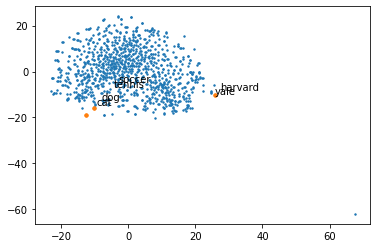

In [38]:
# expected results
display_tsne_neighborhood(glove, input_word = ['yale', 'harvard', 'cat', 'kitten', 'dog', 'puppy'])
display_tsne_neighborhood(model.wv, input_word =['yale', 'harvard', 'cat', 'dog', 'tennis', 'soccer'])

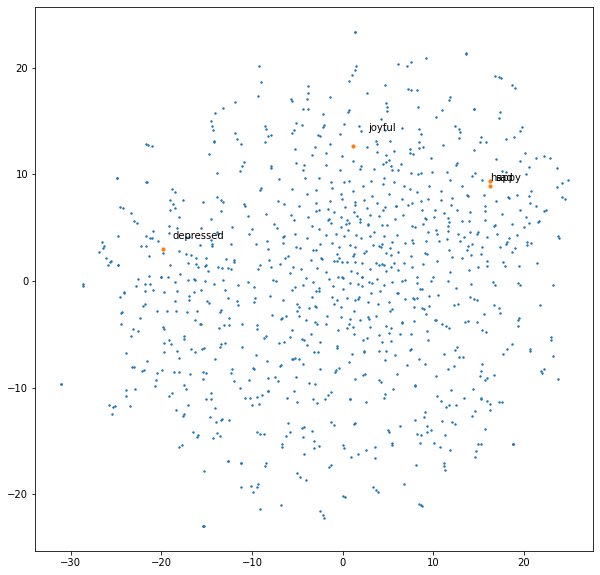

In [36]:
# Surprising Examples
%matplotlib inline
plt.figure(figsize=(10, 10))
display_tsne_neighborhood(model.wv, input_word =['happy', 'sad', 'depressed', 'joyful'])


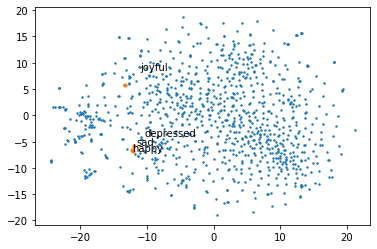

In [39]:
display_tsne_neighborhood(glove, input_word =['happy', 'sad', 'depressed', 'joyful'])


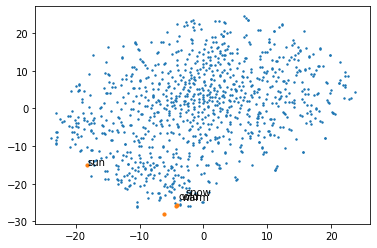

In [37]:
display_tsne_neighborhood(model.wv, input_word =['sun', 'warm', 'snow', 'cold'])

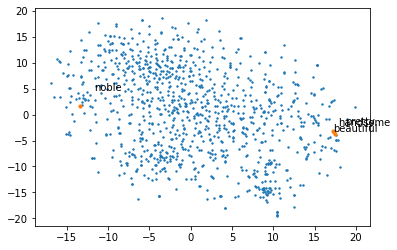

In [40]:
display_tsne_neighborhood(glove, input_word =['beautiful', 'handsome', 'pretty', 'noble'])

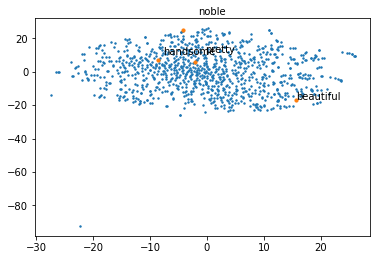

In [38]:
display_tsne_neighborhood(model.wv, input_word =['beautiful', 'handsome', 'pretty', 'noble'])

The model we are using are not that advance or complicated, so it make simple decisions. Sometimes the word could have multiple meanings so our model confuses it. For example, 'sun' has many aspects and attributes, hence it is far away from warm and snow.

### Problem  3: Experiments with Musician Embeddings (15 points)


In this problem, we will use a collection of playlists obtained from [last.fm](http://last.fm). We treat each playlist as a document, and each artist in the playlist as a word. By feeding this dataset to word2vec, we will be able to learn artist embeddings.

#### Artist Embeddings

The following experiments will be done with the playlist data file `playlists.txt`. Each line in this file is a playlist. The integers on each line are unique artist identifiers, indicating which artists were in each playlist. The artists are in `artists.txt`.

The code below constructs artist embeddings with word2vec. The artist names are mapped to id numbers in the playlists; the code maps them back to display the names.

In [1]:
import gensim
from gensim.models import word2vec
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
playlists = word2vec.LineSentence('https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn5/playlists.txt')
music_model = word2vec.Word2Vec(playlists, vector_size=64, window=100, min_count=10)

2021-11-11 23:21:11,512 : INFO : collecting all words and their counts
2021-11-11 23:21:11,802 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-11-11 23:21:13,264 : INFO : PROGRESS: at sentence #10000, processed 107891 words, keeping 3250 word types
2021-11-11 23:21:14,273 : INFO : collected 3292 word types from a corpus of 189900 raw words and 18111 sentences
2021-11-11 23:21:14,274 : INFO : Creating a fresh vocabulary
2021-11-11 23:21:14,286 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=10 retains 2228 unique words (67.67922235722965%% of original 3292, drops 1064)', 'datetime': '2021-11-11T23:21:14.284913', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22494-SP0', 'event': 'prepare_vocab'}
2021-11-11 23:21:14,288 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=10 leaves 183255 word corpus (96.50078988941549%% of original 189900, drops 6645)

In [8]:
music_model.wv['299']

array([ 0.43221834, -0.719046  ,  0.35036913, -0.14231592,  0.4971208 ,
       -0.1797617 , -0.5566266 ,  0.20567587,  0.13281594,  1.0846256 ,
       -1.0277593 ,  0.03148408, -1.1114904 ,  1.0139874 , -0.58704954,
        0.71923184, -1.2146462 , -0.4928999 , -0.17486212, -0.00302529,
        0.3356248 , -0.1338086 ,  0.8927364 , -0.5659078 ,  0.14080319,
        0.07290081, -0.62687695, -0.37941518, -0.2949403 ,  0.6088427 ,
        0.12690884, -0.73043376, -0.4217455 , -0.5017378 ,  0.22015284,
       -0.79450095, -0.03438405,  0.62053007,  0.2710968 , -0.21670812,
       -0.3212371 ,  0.4089281 ,  0.47807458, -0.04247258, -0.73664457,
       -0.24361713, -0.14736517, -0.265629  ,  0.39810064,  0.8482604 ,
       -0.18930028, -0.9559344 ,  0.5377905 ,  0.99594253,  0.24159366,
        0.8123202 ,  0.6239836 , -0.84368503, -0.44289273,  1.108842  ,
       -0.2063995 , -0.8246551 , -0.18020152,  0.48357093], dtype=float32)

In [7]:
from urllib.request import urlopen 

artist = []
file = urlopen('https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn5/artists.txt')
for line in file:
    art = line.decode("utf-8")
    artist.append(art.strip())

artist[0:10]

['Everette Harp',
 'Bishop Paul S. Morton & Aretha Franklin',
 'Frankie Ballard',
 'Herb Alpert',
 'Rod Stewart & Chaka Khan',
 'Scars On 45',
 'New Radicals',
 'Crosby, Stills & Nash',
 'Ledisi',
 'La Quinta Estacion']

In [10]:
id2name = {}
name2id = {}
for w in range(len(artist)):
    id2name["%s" % w] = artist[w]
    name2id[artist[w]] = "%s" % w

id2name[name2id['Elton John']]

'Elton John'

#### 3.1 Similar artists

Find the 5 closest artist embedding vectors to the artists "The Beatles", "Lady Gaga", and "Nirvana". Comment on the results.

In [11]:
# Don't change this function
def similar_artists(model, artist, n=5):
    id = name2id[artist]
    out = model.wv.most_similar(id, topn=n)

    print("artists similar to '%s'\n" % artist)
    for i in range(n) :
        name = id2name[out[i][0]]
        print("\t%s" % name)
        
similar_artists(music_model, 'Aerosmith')

artists similar to 'Aerosmith'

	Billy Idol
	The Jimi Hendrix Experience
	Cheap Trick
	Def Leppard
	George Thorogood & The Destroyers


In [52]:
similar_artists(music_model, 'The Beatles')

artists similar to 'The Beatles'

	Steppenwolf
	Grand Funk Railroad
	Creedence Clearwater Revival
	The Electric Light Orchestra
	Warren Zevon


In [53]:
similar_artists(music_model, 'Lady Gaga')

artists similar to 'Lady Gaga'

	Bruno Mars
	Katy Perry
	Black Eyed Peas
	Christina Perri
	Pink


In [54]:
similar_artists(music_model, 'Nirvana')

artists similar to 'Nirvana'

	Pearl Jam
	Temple Of The Dog
	Faith No More
	Stone Temple Pilots
	Bush


For each artist, the music style and active time period of the 5 closest artists is similar to him/her/themselves. For example, The Beatles were an English rock band active between 1960 and 1970, while Steppenwolf was an American rock band that was prominent from 1968 to 1972. The Electric Light Orchestra (ELO) are an English rock band formed in Birmingham in 1970. Also, Nirvana and Beatles are bands so the closest artists are mostly bands. Lady Gaga is single singer so Bruno Mars, Katy Perry, etc. are single popular singers.

#### 3.3 Visualize embeddings

Use the t-SNE dimensionality reduction technique to visualize the artist embeddings. After running t-SNE on the artist embeddings, try visualizing  "The Temptations" and "The Supremes" together. Find a few more examples that you think are interesting and include the plots in your write-up. Comment on your findings.

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# this functions computes and displays the 2-d t-SNE maps for a subset of the embedding vectors
# and displays them together with the points for a set of input words.

def display_tsne_artists(model, artists, nsample=1000, size1=2, size2=10, offset=5):
    
    arr = np.empty((0,64), dtype='f')

    # add the vector for each of the closest words to the array
    for a in range(len(artists)):
        id = name2id[artists[a]]
        arr = np.append(arr, np.array([model[id]]), axis=0)

    voc = [w for w in model.key_to_index]
    ids = np.random.choice(range(len(voc)), size=nsample, replace=False)
    for w in ids:
        wrd_vector = model[voc[w]]
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coord = Y[:, 0]
    y_coord = Y[:, 1]
    # display scatter plot
    size=2
    plt.scatter(x_coord, y_coord, s=size1)
    plt.scatter(x_coord[0:len(artists)], y_coord[0:len(artists)],s=size2)
    
    # label the input words
    for w in range(len(artists)):
        plt.annotate(artists[w], xy=(x_coord[w],y_coord[w]), \
                     xytext=(w*offset,w*offset), textcoords='offset points')
    plt.show()

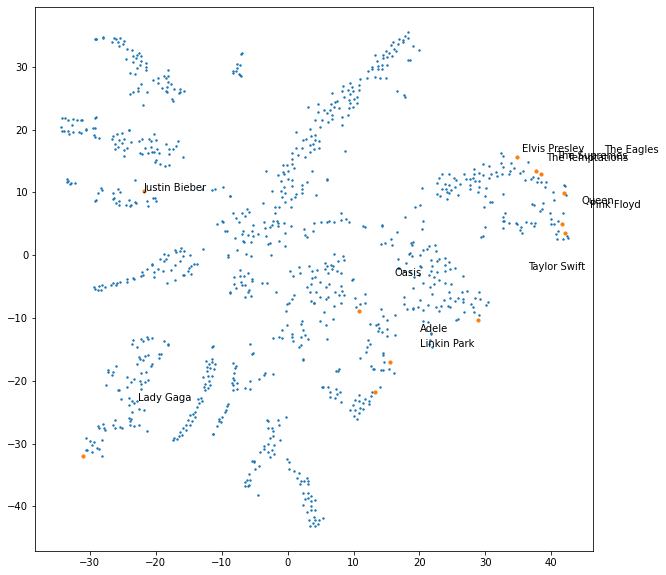

In [23]:
%matplotlib inline
plt.figure(figsize=(10, 10))
display_tsne_artists(music_model.wv, artists=["Justin Bieber", "Elvis Presley", "The Temptations", "The Supremes", "Queen", "Pink Floyd", "Adele", "Oasis", "The Eagles", "Linkin Park", 'Taylor Swift', 'Lady Gaga'])

The music style and active time period are the most important variables for clustering. For example, "Pink Floyd" and "Queen" belong to the same music genre "rock" and they are active at the same time period. We can see that generally the lefter the samples are in the plot, the later their active years are. Also, the up and right clustering is the rock genre artists active on 1960-1990s, and the down cluster is the popular genre artists active on 21st century.